In [1]:
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler

%matplotlib inline

In [3]:
t0 = time.time()
df = pd.read_csv("./data_v4/ExpressionMatrix_cleaned.csv", 
                 index_col="sample")
print("loading matrix takes {0} seconds".format(time.time()-t0))

loading matrix takes 151.07967948913574 seconds


In [5]:
df.shape

(18106, 22211)

In [6]:
pca = PCA()
X = df[df.columns[3:]]
t0 = time.time()
pca.fit(X)
print("fitting PCA to this matrix takes {0} seconds".format(time.time()-t0))

fitting PCA to this matrix takes 2210.7417068481445 seconds


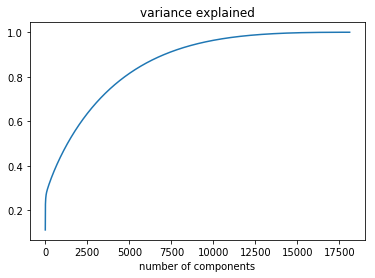

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("variance explained")
plt.xlabel("number of components")

In [19]:
# get number of components where 40%, 60%, 80% of variations are preserved
def get_n_component_for_x_variance(x, variance_list):
    for i, variance in enumerate(variance_list):
        if variance > x:
            return i 

variance_preserved = np.cumsum(pca.explained_variance_ratio_)
variance_dict = {}
for variance in [0.2, 0.3, 0.4, 0.6,0.8,0.9,0.95,0.99]:
    n_components = get_n_component_for_x_variance(
        variance, variance_preserved)
    variance_dict[variance] = n_components

In [20]:
print(variance_dict)

{0.2: 4, 0.3: 148, 0.4: 658, 0.6: 2155, 0.8: 4724, 0.9: 7077, 0.95: 9141, 0.99: 12820}


In [18]:
X_tranformed = pca.transform(X)

In [ ]:
for variance, n_component in variance_dict.items():
    df_PCA = pd.DataFrame(X_tranformed[:, :n_component], index=df.index)
    df_PCA.to_csv("./data_v4/ExpressionMatrix_PCA_{0}_variance.csv".format(
        variance))